<a href="https://colab.research.google.com/github/VermaSanjayrk/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [139]:
#loading the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date           #Used for analysing the date variable
from scipy import stats             #used for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor        #For Multicolinearity
from sklearn.model_selection import train_test_split
import os


In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Loading Data set of csv file-
bike_df=pd.read_csv('/content/drive/MyDrive/Seoul Bike Sharing Demand Prediction github/SeoulBikeData.csv',encoding='ISO-8859-1')

# ***Data Summary***

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [142]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [143]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [144]:
#Shape of the dataset
bike_df.shape

(8760, 14)

In [145]:
#all the columns in the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [146]:
#the number of unique values that each column contains
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [147]:
#showing the datatype of all features
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [148]:
#Summary of the dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [149]:
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [150]:
#Missing values in dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

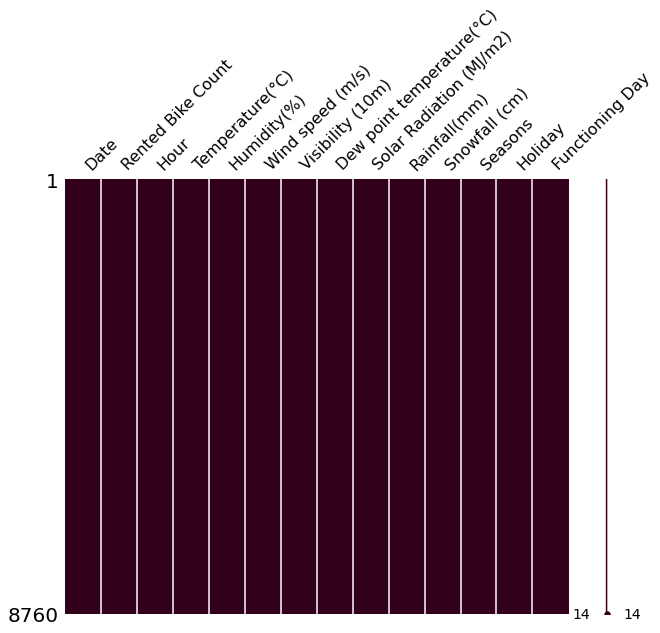

In [151]:
#checking for nan values
mno.matrix(bike_df,figsize=(10,8),color=(0.2, 0.0, 0.11))

***there is no missing values on data, but there is a lot of zeros data, it can be nan?***

## **Conversion of Date column using Datetime type-**

In [152]:
bike_df.Date = pd.to_datetime(bike_df.Date, format="%d/%m/%Y")

In [153]:
# To convert data format in separate variable as date, year and month
bike_df['Date'] = pd.to_datetime(bike_df['Date'])
bike_df['Year'] =bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day
bike_df.insert(4, 'WeekDay',bike_df["Date"].dt.day_name())

### **Feature Engineering-**


**Rename Columns to call columns by dot**

In [154]:
bike_df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*bike_df.columns]]
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Weekday',
       'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point_Temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning_Day', 'Year', 'Month', 'Day'],
      dtype='object')

### ***Best Fitting Line Between Feature And Target-***

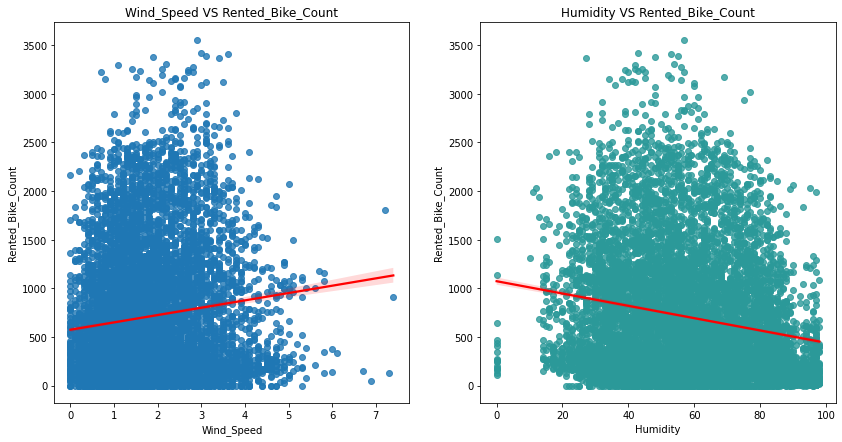

In [155]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14, 7)
g1 = sns.regplot(x='Wind_Speed', y="Rented_Bike_Count", 
                 data=bike_df,ax=ax1,
                 line_kws={'color': 'red'})

g1.set_title('Wind_Speed VS Rented_Bike_Count')
g2 = sns.regplot(x='Humidity', y="Rented_Bike_Count",
                 data=bike_df,ax=ax2,
                 color="#2b9999",
                 line_kws={'color': 'red'})

g2.set_title('Humidity VS Rented_Bike_Count')
plt.show()

***Comment:- The best fit line describes- When there is Low Wind speed the rented bike count is maximum or populated.And, as humidity level decreases the count of rented bike increases.***

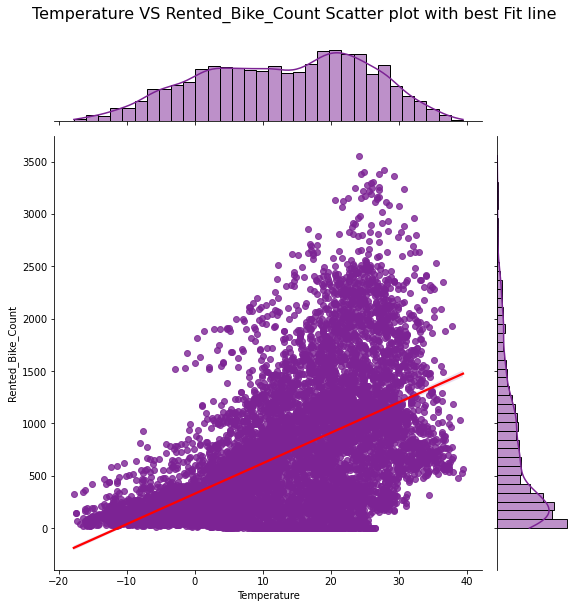

In [156]:
g = sns.jointplot(x="Temperature", y="Rented_Bike_Count", data=bike_df, kind='reg',color="#7c2394",height=8)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
g.fig.suptitle("Temperature VS Rented_Bike_Count Scatter plot with best Fit line", y=1.05, fontsize=16)
plt.show()

***Comment:- As the temperature feature is nearly normally distributed,the rented bike count is equally affected by the rise in temperature.***

**Target With & Without Outliers Distribution-**

In [157]:
bike_df_without_Outliers = bike_df[np.abs(bike_df["Rented_Bike_Count"]-bike_df["Rented_Bike_Count"].mean())<=(1*bike_df["Rented_Bike_Count"].std())] 

In [158]:
print ("Shape Of The Before Ouliers: ",bike_df.shape)
print ("Shape Of The After Ouliers: ",bike_df_without_Outliers.shape)

Shape Of The Before Ouliers:  (8760, 18)
Shape Of The After Ouliers:  (6534, 18)


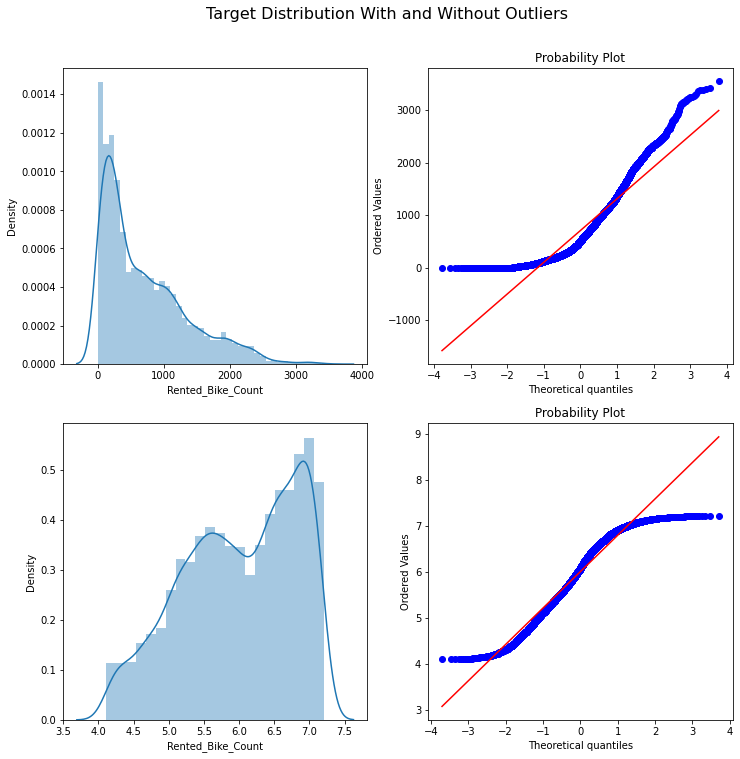

In [159]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 12)
fig.suptitle('Target Distribution With and Without Outliers', fontsize=16, y=0.95)
sns.distplot(bike_df["Rented_Bike_Count"],ax=axes[0][0])
stats.probplot(bike_df["Rented_Bike_Count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(bike_df_without_Outliers["Rented_Bike_Count"]),ax=axes[1][0])
stats.probplot(np.log1p(bike_df_without_Outliers["Rented_Bike_Count"]), dist='norm', fit=True, plot=axes[1][1])
plt.show()

## Data Visualization

Seprate dependent and independent variables




In [160]:
dependent_variable ='Rented Bike Count'

In [161]:
independent_variables = list(set(bike_df.columns.tolist())-{dependent_variable})
independent_variables

['Dew_Point_Temperature',
 'Humidity',
 'Hour',
 'Rented_Bike_Count',
 'Temperature',
 'Functioning_Day',
 'Year',
 'Month',
 'Day',
 'Rainfall',
 'Wind_Speed',
 'Weekday',
 'Snowfall',
 'Holiday',
 'Seasons',
 'Date',
 'Solar_Radiation',
 'Visibility']

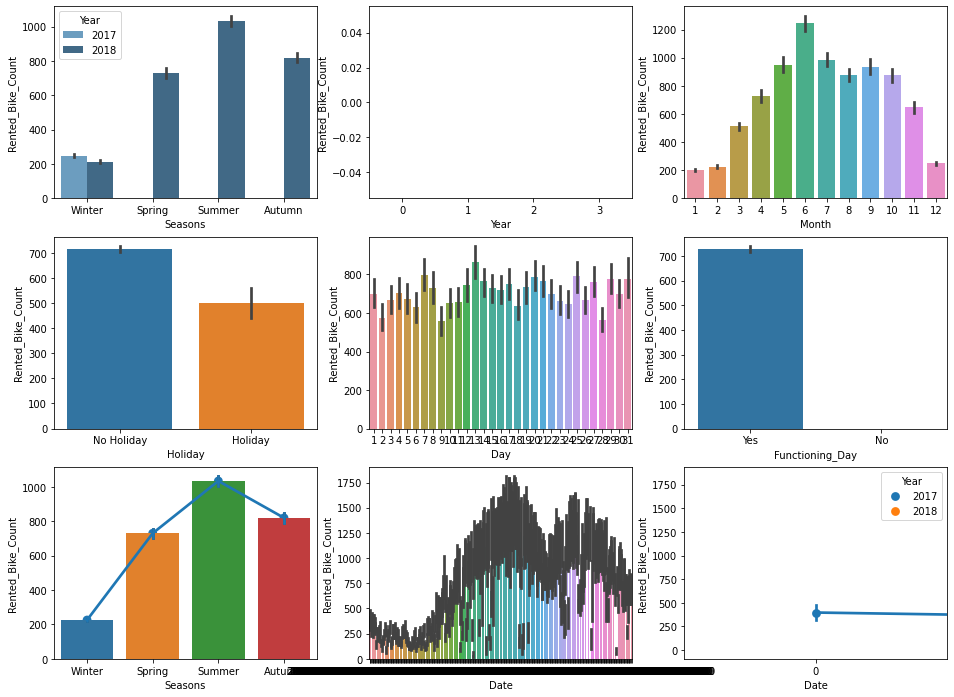

In [162]:
#Graph of individual categorical features by count-
fig, saxis = plt.subplots(3, 3,figsize=(16,12))

sns.barplot(x = 'Seasons', y = 'Rented_Bike_Count',hue= 'Year', data=bike_df, ax = saxis[0,0], palette ="Blues_d")
sns.barplot(x = 'Year', y = 'Rented_Bike_Count', order=[0,1,2,3], data=bike_df, ax = saxis[0,1], palette ="Blues_d")
sns.barplot(x = 'Month', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[0,2])
sns.barplot(x = 'Holiday', y = 'Rented_Bike_Count',  data=bike_df, ax = saxis[1,0])
sns.barplot(x = 'Day', y = 'Rented_Bike_Count',  data=bike_df, ax = saxis[1,1])
sns.barplot(x = 'Functioning_Day', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[1,2])
sns.barplot(x = 'Seasons', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[2,0])
sns.barplot(x = 'Date', y = 'Rented_Bike_Count' , data=bike_df, ax = saxis[2,1])
sns.pointplot(x = 'Seasons', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[2,0])
sns.pointplot(x='Date', y='Rented_Bike_Count', hue='Year', data=bike_df, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[2,2])
sns.pointplot()

***Comment:-This categorical graphs represents all above conclsuions are correct.It shows,Summer season,Functioning hours,month of June and no holiday has the highest rented bike count.And,we observe the fluctuations for rental bikes in day & date variables.***

### **Outlier Analysis using Boxplot-**


**Univariate Boxplots: Boxplot for all Numerical Variables. Also for target variable-**

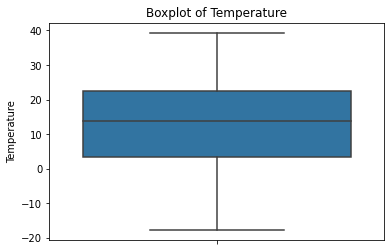

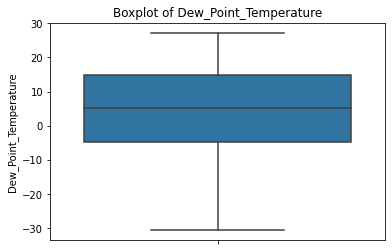

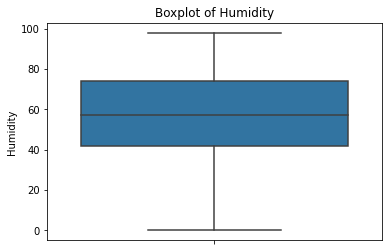

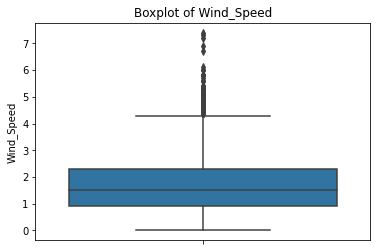

In [163]:
cat_var=['Seasons','Holiday','Day','Functioning_Day','Year','Month']
bike_df[cat_var]=bike_df[cat_var].apply(lambda x: x.astype('category') )
num_var=['Temperature','Dew_Point_Temperature','Humidity','Wind_Speed']

for i in num_var:
    sns.boxplot(y=i,data=bike_df)
    plt.title('Boxplot of '+i)
#     plt.savefig('bp'+str(i)+'.png')
    plt.show()

***Comment:-As we can see from the above Boxplots-Univariate only 'Dew point temperature' and 'Windspeed' features in the dataset has the outliers.*** 

# **Correlation matrix**

Correlation matrix tells about the linear relationship between attributes and help us to build better models.

In [164]:
bike_df.corr()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_Speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_Point_Temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


### **Feature Selection-**
## Correlation Analysis for Numerical Variables/Features:
We will plot a Heatmap of correlation whereas, correlation measures how strongly 2 quantities are related to each other.
We go for correlation to avoid redundant information in our model development.

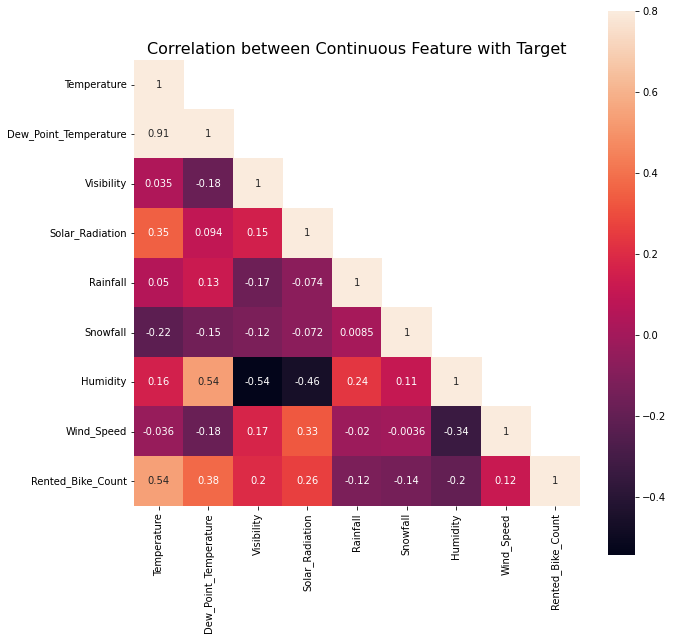

In [165]:
# heatmap using correlation matrix
# list of continuous feature
columns = ["Temperature","Dew_Point_Temperature","Visibility","Solar_Radiation",
           "Rainfall","Snowfall","Humidity","Wind_Speed","Rented_Bike_Count"]
# calculate correlation matrix.
corrMatt = bike_df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between Continuous Feature with Target", fontsize=16, y=1.05)
plt.show()

### ***Comment:- 'Temperature' and 'Dew point temperature' are very highly correlated with each other.***




### **From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp. and dew point temp. are highly positively correlated to each other, it means that both are carrying same information. So, we are going to ignore temp & dew pointfor further analysis.**

In [166]:
#Normalisation-
for i in num_var:
    print(i)
    bike_df[i] = (bike_df[i] - min(bike_df[i]))/(max(bike_df[i]) - min(bike_df[i]))

Temperature
Dew_Point_Temperature
Humidity
Wind_Speed


**Distribution** **after** **Normalisation-**

Let us check variance for each column in dataset after Normalisation

In [167]:
bike_df[num_var].var()

Temperature              0.043608
Dew_Point_Temperature    0.051057
Humidity                 0.043172
Wind_Speed               0.019611
dtype: float64

## **Multicollinearity Test-**

Preparing the new data frame with selected columns-


In [168]:
bike_df =bike_df[['Year', 'Month', 'Day', 'Rented_Bike_Count', 'Hour',  'Holiday',  'Visibility','Temperature', 
                'Humidity', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind_Speed']]

In [169]:
bike_df.dtypes

Year                     category
Month                    category
Day                      category
Rented_Bike_Count           int64
Hour                        int64
Holiday                  category
Visibility                  int64
Temperature               float64
Humidity                  float64
Dew_Point_Temperature     float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Seasons                  category
Wind_Speed                float64
dtype: object

In [170]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Year                   8760 non-null   category
 1   Month                  8760 non-null   category
 2   Day                    8760 non-null   category
 3   Rented_Bike_Count      8760 non-null   int64   
 4   Hour                   8760 non-null   int64   
 5   Holiday                8760 non-null   category
 6   Visibility             8760 non-null   int64   
 7   Temperature            8760 non-null   float64 
 8   Humidity               8760 non-null   float64 
 9   Dew_Point_Temperature  8760 non-null   float64 
 10  Solar_Radiation        8760 non-null   float64 
 11  Rainfall               8760 non-null   float64 
 12  Snowfall               8760 non-null   float64 
 13  Seasons                8760 non-null   category
 14  Wind_Speed             8760 non-null   f

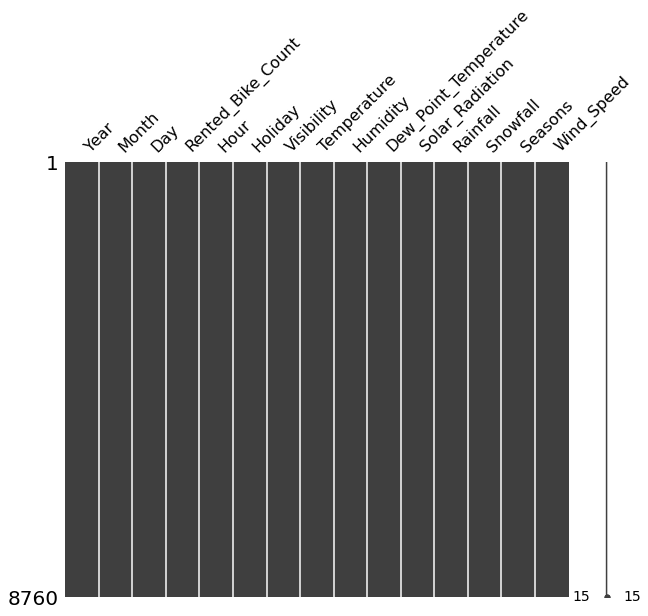

In [171]:
# checking missing values in new dataframe-
mno.matrix(bike_df,figsize=(10,8))

In [172]:
# Replacing missing values by NAN -
bike_df['Wind_Speed'].fillna('unknown',inplace=True)

In [173]:
# Importing libraries for multicollinearity-
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [175]:
# VIF -
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in['Day', 'Year', 'Temperature']]])

,Variables,VIF
0,Rented_Bike_Count,4.113305
1,Hour,4.638382
2,Visibility,4.926489
3,Humidity,18.191435
4,Dew_Point_Temperature,23.550775
5,Solar_Radiation,2.296112
6,Rainfall,1.097941
7,Snowfall,1.126871
8,Wind_Speed,4.567175


**From above Dataframe we see that there is Multicollinearity in our Data
Dew point temperature(°C) and Humidity(%) has highest VIF value**



Now we will drop the highest mulicolinearity column


In [176]:
columns = ['Humidity','Dew_Point_Temperature']
bike_df['mean_Humidity'] = bike_df.apply(lambda row: row[columns].mean(), axis=1)

In [177]:
#To drop columns-
bike_df = bike_df.drop(['Humidity','Dew_Point_Temperature'],axis = 1)

# **One-Hot Encoding-**

we will use one-hot encoding techniques on categorical variables - Season,Holiday,Year

In [178]:
bike_df.nunique()

Year                    2
Month                  12
Day                    31
Rented_Bike_Count    2166
Hour                   24
Holiday                 2
Visibility           1789
Temperature           546
Solar_Radiation       345
Rainfall               61
Snowfall               51
Seasons                 4
Wind_Speed             65
mean_Humidity        7306
dtype: int64

In [179]:
one_hot_var = ['Seasons','Holiday','Year']

In [180]:
#Creating dummies for categorical variables-
for i in one_hot_var:
    ''' Creating dummies for each variable in one_hot_var and merging dummies dataframe to our original dataframe '''
    temp= pd.get_dummies(bike_df[i], prefix = i)
    bike_df = bike_df.join(temp)

In [181]:
bike_df.columns

Index(['Year', 'Month', 'Day', 'Rented_Bike_Count', 'Hour', 'Holiday',
       'Visibility', 'Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Wind_Speed', 'mean_Humidity', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Year_2017', 'Year_2018'],
      dtype='object')

We will remove the variables which were used to generate one hot encoding variables-

In [182]:
bike_df = bike_df.drop(['Seasons','Holiday','Year'],axis = 1)


**Let's check the new data frame**-

In [183]:
new_df=bike_df.columns
new_df

Index(['Month', 'Day', 'Rented_Bike_Count', 'Hour', 'Visibility',
       'Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Wind_Speed',
       'mean_Humidity', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Year_2017',
       'Year_2018'],
      dtype='object')

In [184]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Month               8760 non-null   category
 1   Day                 8760 non-null   category
 2   Rented_Bike_Count   8760 non-null   int64   
 3   Hour                8760 non-null   int64   
 4   Visibility          8760 non-null   int64   
 5   Temperature         8760 non-null   float64 
 6   Solar_Radiation     8760 non-null   float64 
 7   Rainfall            8760 non-null   float64 
 8   Snowfall            8760 non-null   float64 
 9   Wind_Speed          8760 non-null   float64 
 10  mean_Humidity       8760 non-null   float64 
 11  Seasons_Autumn      8760 non-null   uint8   
 12  Seasons_Spring      8760 non-null   uint8   
 13  Seasons_Summer      8760 non-null   uint8   
 14  Seasons_Winter      8760 non-null   uint8   
 15  Holiday_Holiday     8760 non-null   ui

In [185]:
# convert the type of all columns of DataFrame-
df = bike_df.apply(pd.to_numeric,errors='coerce') # convert all columns of DataFrame

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               8760 non-null   int64  
 1   Day                 8760 non-null   int64  
 2   Rented_Bike_Count   8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Visibility          8760 non-null   int64  
 5   Temperature         8760 non-null   float64
 6   Solar_Radiation     8760 non-null   float64
 7   Rainfall            8760 non-null   float64
 8   Snowfall            8760 non-null   float64
 9   Wind_Speed          8760 non-null   float64
 10  mean_Humidity       8760 non-null   float64
 11  Seasons_Autumn      8760 non-null   uint8  
 12  Seasons_Spring      8760 non-null   uint8  
 13  Seasons_Summer      8760 non-null   uint8  
 14  Seasons_Winter      8760 non-null   uint8  
 15  Holiday_Holiday     8760 non-null   uint8  
 16  Holida

In [187]:
# To replace the values of infinity -
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [188]:
df.head()

,Month,Day,Rented_Bike_Count,Hour,Visibility,Temperature,Solar_Radiation,Rainfall,Snowfall,Wind_Speed,mean_Humidity,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Year_2017,Year_2018
0,12,1,254,0,2000,0.220280,0.0,0.0,0.0,0.297297,0.301232,0,0,0,1,0,1,1,0
1,12,1,204,1,2000,0.215035,0.0,0.0,0.0,0.108108,0.306334,0,0,0,1,0,1,1,0
2,12,1,173,2,2000,0.206294,0.0,0.0,0.0,0.135135,0.310571,0,0,0,1,0,1,1,0
3,12,1,107,3,2000,0.202797,0.0,0.0,0.0,0.121622,0.316538,0,0,0,1,0,1,1,0
4,12,1,78,4,2000,0.206294,0.0,0.0,0.0,0.310811,0.287480,0,0,0,1,0,1,1,0


In [189]:
df.shape

(8760, 19)